In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
delta_t = 0.01

In [4]:
columns = ['gx', 'gy', 'gz', 'ax', 'ay', 'az', 'angx', 'angy', 'angz', 'pidx', 'pidy', 'pidz']
data = []
with open('./data_1.txt', 'r') as f:
    data = [l.strip()[:-1] for l in f.readlines() if len(l.strip()) > 0]
data = [[float(_d) for _d in d.split(',')] for d in data]
data = np.array(data)

In [5]:
df_raw_data = pd.DataFrame(data=data, columns=columns)
df_raw_data

,gx,gy,gz,ax,ay,az,angx,angy,angz,pidx,pidy,pidz
0,-0.35,-0.03,0.03,-0.06,0.28,9.39,1.26,-0.37,-5.96,-6.38,1.81,0.0
1,-0.26,-0.11,0.00,-0.07,0.28,9.61,1.26,-0.37,-5.96,-6.29,1.74,0.0
2,-0.26,0.09,-0.03,-0.09,0.29,9.36,1.26,-0.37,-5.96,-6.29,1.93,0.0
3,-0.31,-0.05,0.02,-0.05,0.29,9.59,1.26,-0.37,-5.95,-6.33,1.80,0.0
4,-0.26,0.09,-0.06,-0.06,0.27,9.50,1.26,-0.37,-5.95,-6.29,1.93,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,-0.34,0.00,-0.06,-0.13,0.32,9.50,1.14,0.52,2.43,-5.61,-3.23,0.0
1679,-0.38,0.05,-0.02,-0.13,0.32,9.51,1.14,0.51,2.43,-5.65,-3.16,0.0
1680,-0.27,0.03,-0.03,-0.11,0.31,9.52,1.14,0.51,2.43,-5.55,-3.15,0.0
1681,-0.26,0.06,0.09,-0.07,0.31,9.50,1.14,0.50,2.43,-5.54,-3.09,0.0


In [6]:
data = [[0,0,0]]
# for 
for d in df_raw_data[['gx', 'gy', 'gz']].values:
    data.append([
        data[-1][0] + d[0] * delta_t,
        data[-1][1] + d[1] * delta_t,
        data[-1][2] + d[2] * delta_t
    ])
data = np.array(data[1:])

df_gyro_angle = pd.DataFrame(data=data, columns=['x', 'y', 'z'])

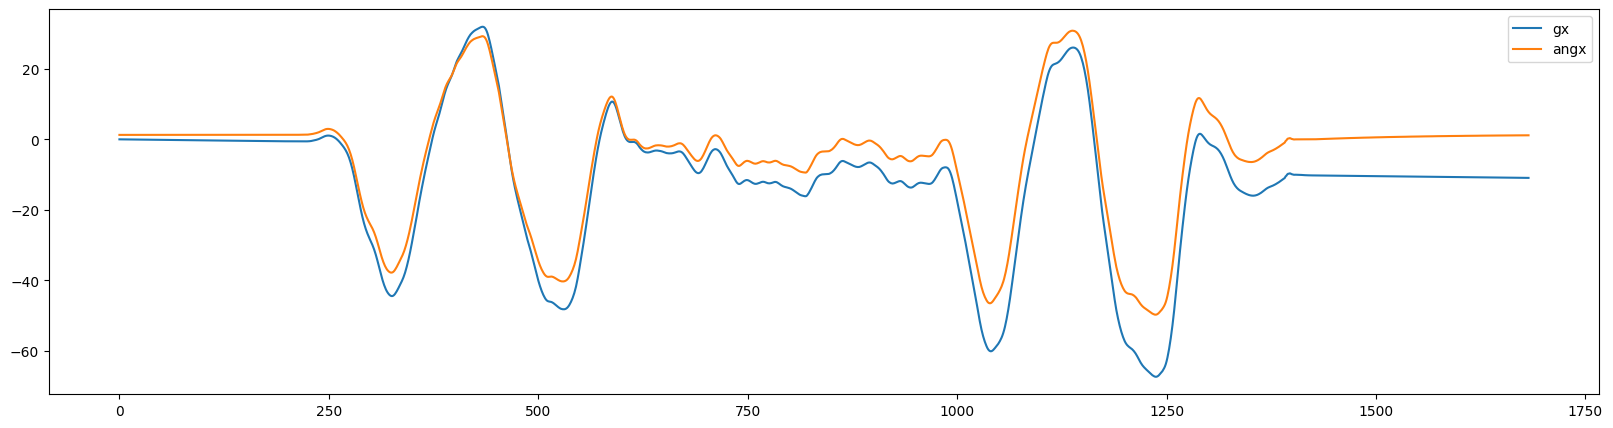

In [7]:
plot_data = [
    [df_gyro_angle['x'], 'gx'],
    [df_raw_data['angx'], 'angx'],
]

plt.figure(figsize=(20, 5))
for d, _ in plot_data:
    plt.plot(d)
plt.legend([p[1] for p in plot_data])
plt.show()

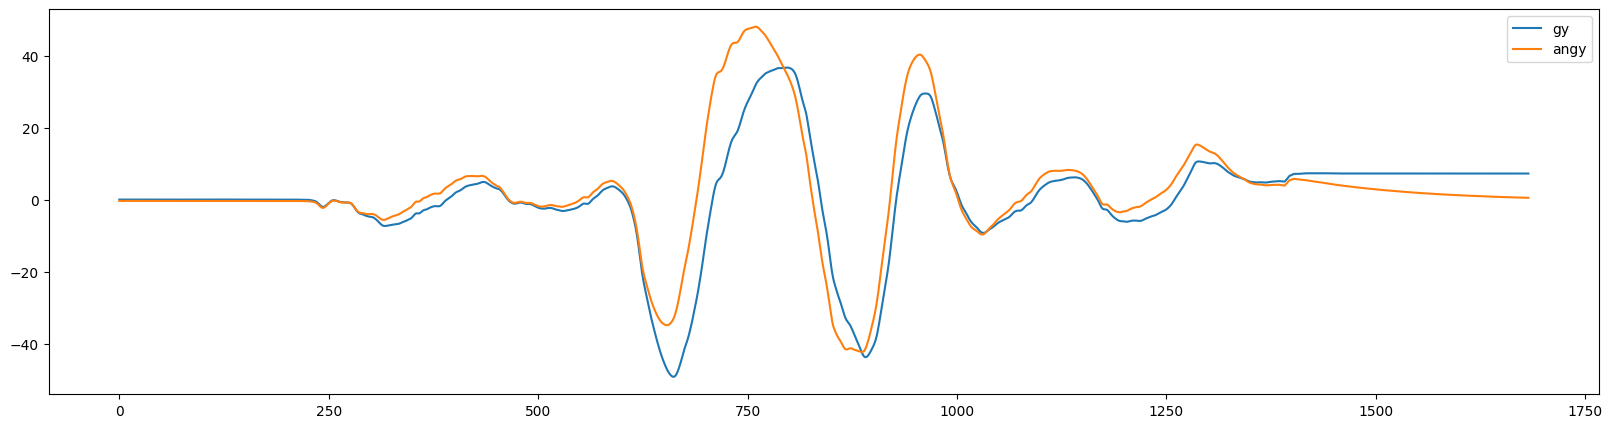

In [8]:
plot_data = [
    [df_gyro_angle['y'], 'gy'],
    [df_raw_data['angy'], 'angy'],
]

plt.figure(figsize=(20, 5))
for d, _ in plot_data:
    plt.plot(d)
plt.legend([p[1] for p in plot_data])
plt.show()

In [10]:
df_gyro_angle['y'].values[-100], df_raw_data['angy'].values[-100]

(7.238800000000009, 1.4)